# Assignment 2 

**Total marks: 10 (This assignment total to 20, we will overall scale by a factor of 0.5)**

> ## Task 1 : Ascending the Gradient Descent [6 marks]

> Use the below dataset for Task 1: 
``` python
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps
```

> 1. Use ```torch.autograd``` to find the true gradient on the above dataset using linear regression (in the form $\theta_1x + \theta_0$) for any given values of $(\theta_0,\theta_1)$. **[1 mark]**


In [16]:
import torch
import numpy as np
from torch import nn

np.random.seed(45)
num_samples = 40

#Generate Data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

x_train = torch.tensor(x1, dtype=torch.float32).reshape(-1, 1)
y_train = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

#Initializing Parameters
theta_0 = torch.randn(1, requires_grad=True, dtype=torch.float32)
theta_1 = torch.randn(1, requires_grad=True, dtype=torch.float32)

def linear_regression_model(x):
    return theta_1 *  x + theta_0

def mse_loss(y_true, y_pred):
    return torch.mean((y_true - y_pred)**2)

y_pred = linear_regression_model(x_train)
loss = mse_loss(y_train, y_pred)

loss.backward()

#Gradient of the loss function
print(f"Gradient for θ_0: {theta_0.grad.item()}")
print(f"Gradient for θ_0: {theta_1.grad.item()}")


Gradient for θ_0: -4.691332817077637
Gradient for θ_0: -0.5229082107543945


> 2. Using the same $(\theta_0,\theta_1)$ as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient.  **[1 mark]**


In [23]:
import torch

# Initialize global parameters with requires_grad=True
theta_0 = torch.randn(1, requires_grad=True, dtype=torch.float32)
theta_1 = torch.randn(1, requires_grad=True, dtype=torch.float32)

# Define the linear regression model
def linear_regression_model(x):
    return theta_1 * x + theta_0

# Define the MSE loss function
def mse_loss(y_true, y_pred):
    return torch.mean((y_pred - y_true) ** 2)

# Compute true gradients
y_pred = linear_regression_model(x_train)
loss = mse_loss(y_train, y_pred)
loss.backward()

true_grad_values = (theta_0.grad.item(), theta_1.grad.item())

# Stochastic gradient function
def stochastic_gradient(x_train, y_train):
    stoch_grad_theta_0 = []
    stoch_grad_theta_1 = []
    
    # Use the same global parameters
    global theta_0, theta_1

    for i in range(x_train.shape[0]):
        # Create single data point tensors
        x_single = x_train[i].unsqueeze(0)  
        y_single = y_train[i].unsqueeze(0)  # Add batch dimension

        # Forward pass
        y_pred_i = linear_regression_model(x_single)
        loss = mse_loss(y_single, y_pred_i)
        
        # Zero gradients
        if theta_0.grad is not None:
            theta_0.grad.data.zero_()
        if theta_1.grad is not None:
            theta_1.grad.data.zero_()
        
        # Backward pass
        loss.backward()

        # Store gradients
        stoch_grad_theta_0.append(theta_0.grad.item())
        stoch_grad_theta_1.append(theta_1.grad.item())
    
    avg_theta_0 = sum(stoch_grad_theta_0) / len(stoch_grad_theta_0)
    avg_theta_1 = sum(stoch_grad_theta_1) / len(stoch_grad_theta_1)
    
    return avg_theta_0, avg_theta_1

# Compute stochastic gradients
stochastic_grad_values = stochastic_gradient(x_train, y_train)

#Results
print(f"True Grad Values - θ0: {true_grad_values[0]}, θ1: {true_grad_values[1]}")
print(f"Stochastic Grad Values - θ0: {stochastic_grad_values[0]}, θ1: {stochastic_grad_values[1]}")
  

True Grad Values - θ0: -6.89552116394043, θ1: 0.3293600082397461
Stochastic Grad Values - θ0: -6.895521020889282, θ1: 0.32935997638851405


```
  As we can see from the values of true gradient and sctochastic gradient values they are nearly same upto 6 decimal places.
  So we can estimate that stochastic gradient is nearly a good estimate of true gradient.
```

> 3. Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of $\epsilon$ (or $\epsilon$-neighborhood)  from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose $\epsilon = 0.001$ for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods. **[2 marks]**


Full-Batch Gradient Descent
Epoch: 1/15, Loss: 0.4996490478515625
Epoch: 2/15, Loss: 0.4815505027770996
Epoch: 3/15, Loss: 0.46416025161743163
Epoch: 4/15, Loss: 0.4474501132965088
Epoch: 5/15, Loss: 0.4313931465148926
Epoch: 6/15, Loss: 0.4159632682800293
Epoch: 7/15, Loss: 0.4011356353759766
Epoch: 8/15, Loss: 0.3868864059448242
Epoch: 9/15, Loss: 0.3731925249099731
Epoch: 10/15, Loss: 0.3600320816040039
Epoch: 11/15, Loss: 0.3473836898803711
Epoch: 12/15, Loss: 0.3352272748947144
Epoch: 13/15, Loss: 0.32354321479797366
Epoch: 14/15, Loss: 0.31231276988983153
Epoch: 15/15, Loss: 0.30151798725128176

Mini-Batch Gradient Descent (Batch size = 8)
Epoch: 1/15, Loss: 1.4170331239700318
Epoch: 2/15, Loss: 1.1937057733535767
Epoch: 3/15, Loss: 1.0097726106643676
Epoch: 4/15, Loss: 0.8574558734893799
Epoch: 5/15, Loss: 0.7332853019237519
Epoch: 6/15, Loss: 0.6302947640419007
Epoch: 7/15, Loss: 0.547104787826538
Epoch: 8/15, Loss: 0.47561126947402954
Epoch: 9/15, Loss: 0.41714181303977965
Ep

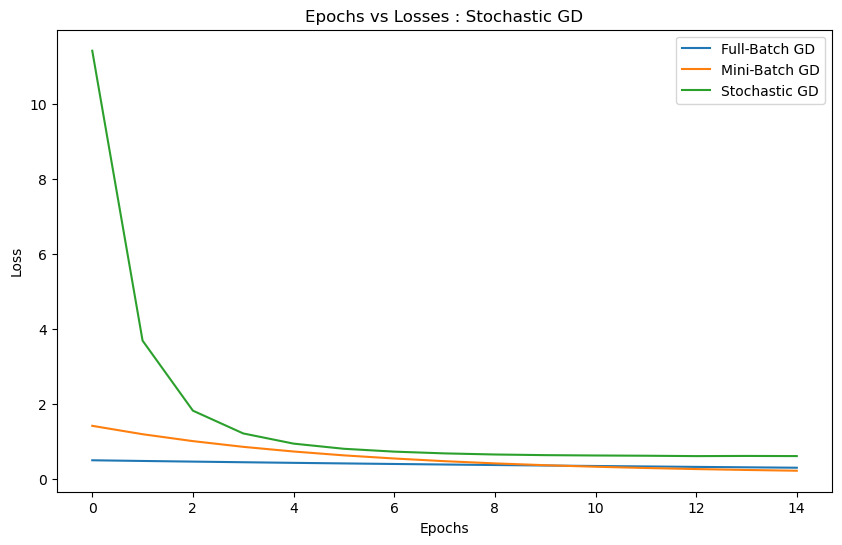


Full-Batch Gradient Descent Contour Plot


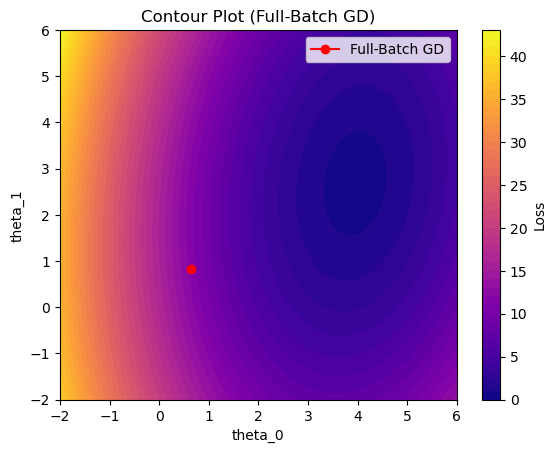


Mini-Batch Gradient Descent Contour Plot


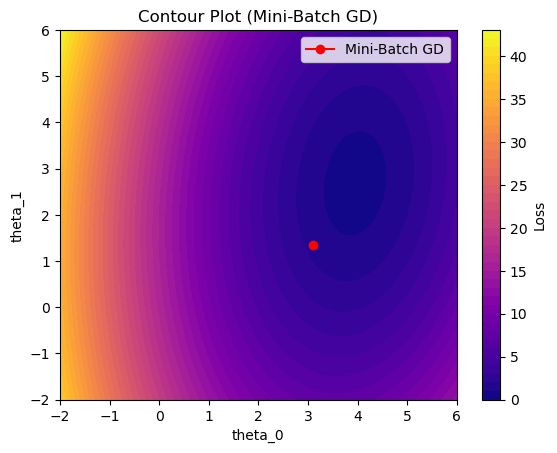


Stochastic Gradient Descent Contour Plot


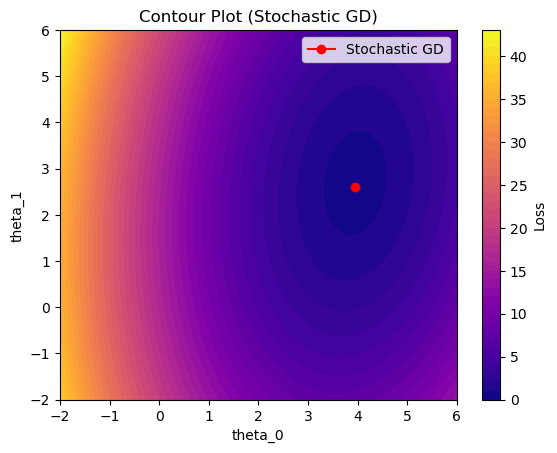

In [48]:
from torch import optim
import matplotlib.pyplot as plt


def get_dataset():
    np.random.seed(45)
    num_samples = 40
    x1 = np.random.uniform(-1, 1, num_samples)
    f_x = 3 * x1 + 4
    eps = np.random.randn(num_samples)
    y = f_x + eps

    x_train = torch.tensor(x1, dtype=torch.float32).unsqueeze(1)  # Shape (40, 1)
    y_train = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    return x_train, y_train


class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__()

        self.theta_0 = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.theta_1 = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        
        #Defining Forward pass for linear regression model
    def forward(self, x : torch.Tensor):
        return self.theta_1 * x + self.theta_0
        
def mse_loss(y_true, y_pred):
    return torch.mean((y_true - y_pred) ** 2)

def gradient_descent(model, x_train : torch.Tensor, y_train : torch.Tensor, 
                     batch_size = None, lr = 0.01, epochs = 15, epsilon = 0.001):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []
    iterations = 0

    for epoch in range(0,epochs):
        epoch_loss = 0
        indices = torch.randperm(len(x_train)) if batch_size else torch.arange(len(x_train))

        for i in range(0, len(x_train), batch_size or len(x_train)):
            batch_indices = indices[i:i+batch_size] if batch_size else indices
            x_batch = x_train[batch_indices]
            y_batch = y_train[batch_indices]

            optimizer.zero_grad()
            
            #Forward Pass
            
            y_pred = model(x_batch)
            #Calculate Loss
            loss = mse_loss(y_batch, y_pred)
            epoch_loss += loss.item() 
            #Backward Pass
            loss.backward()
            optimizer.step()

        
        avg_loss = epoch_loss / len(x_train)
        losses.append(avg_loss)
        iterations += 1

        if avg_loss < epsilon:
            print(f"Converged after iterations:{iterations}")
            break
        
        print(f"Epoch: {epoch + 1}/{epochs}, Loss: {avg_loss}")
    
    return losses, iterations

def plot_loss_curve(losses, method_name):
    plt.plot(losses, label = method_name)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Epochs vs Losses : {method_name}")
    plt.legend()
    # plt.show()

def plot_contour_optimization(theta_0_history, theta_1_history, losses_history, method_name):
    theta_0_range = np.linspace(-2, 6, 100)
    theta_1_range = np.linspace(-2, 6, 100)
    theta_0_mesh, theta_1_mesh = np.meshgrid(theta_0_range, theta_1_range)

    # Create contour plot for loss function
    loss_values = np.zeros_like(theta_0_mesh)
    for i in range(theta_0_mesh.shape[0]):
        for j in range(theta_0_mesh.shape[1]):
            y_pred = theta_1_mesh[i, j] * x_train.numpy() + theta_0_mesh[i, j]
            loss_values[i, j] = np.mean((y_pred - y_train.numpy()) ** 2)
    
    plt.contourf(theta_0_mesh, theta_1_mesh, loss_values, levels=50, cmap="plasma")
    plt.colorbar(label="Loss")

    # Plot optimization path
    theta_0_history = np.array(theta_0_history)
    theta_1_history = np.array(theta_1_history)
    plt.plot(theta_0_history, theta_1_history, marker='o', color='r', label=method_name)
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.legend()
    plt.title(f"Contour Plot ({method_name})")
    plt.show()

# Function to capture parameter history
def get_parameter_history(model):
    return model.theta_0.item(), model.theta_1.item()

print("\nFull-Batch Gradient Descent")
model_full_batch = LinearRegressionModel()
losses_full_batch, iterations_full_batch = gradient_descent(model_full_batch, x_train, y_train, lr=0.01, epochs=15, batch_size=None, epsilon=0.001)

print("\nMini-Batch Gradient Descent (Batch size = 8)")
model_mini_batch = LinearRegressionModel()
losses_mini_batch, iterations_mini_batch = gradient_descent(model_mini_batch, x_train, y_train, lr=0.01, epochs=15, batch_size=8, epsilon=0.001)

print("\nStochastic Gradient Descent (Batch size = 1)")
model_sgd = LinearRegressionModel()
losses_sgd, iterations_sgd = gradient_descent(model_sgd, x_train, y_train, lr=0.01, epochs=15, batch_size=1, epsilon=0.001)

# Plot the results
plt.figure(figsize=(10, 6))
# print(losses_full_batch, losses_mini_batch, losses_sgd, sep="\n")
plot_loss_curve(losses_full_batch, "Full-Batch GD")
plot_loss_curve(losses_mini_batch, "Mini-Batch GD")
plot_loss_curve(losses_sgd, "Stochastic GD")
plt.show()

# Collect parameter history for contour plot
theta_0_history_full_batch, theta_1_history_full_batch = get_parameter_history(model_full_batch)
theta_0_history_mini_batch, theta_1_history_mini_batch = get_parameter_history(model_mini_batch)
theta_0_history_sgd, theta_1_history_sgd = get_parameter_history(model_sgd)


print("\nFull-Batch Gradient Descent Contour Plot")
plot_contour_optimization([theta_0_history_full_batch], [theta_1_history_full_batch], losses_full_batch, "Full-Batch GD")

print("\nMini-Batch Gradient Descent Contour Plot")
plot_contour_optimization([theta_0_history_mini_batch], [theta_1_history_mini_batch], losses_mini_batch, "Mini-Batch GD")

print("\nStochastic Gradient Descent Contour Plot")
plot_contour_optimization([theta_0_history_sgd], [theta_1_history_sgd], losses_sgd, "Stochastic GD")

    


    
        


4. Explore the article [here](https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/#:~:text=Momentum%20is%20an%20extension%20to,spots%20of%20the%20search%20space.) on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an $\epsilon$-neighborhood for both dataset. Choose $\epsilon = 0.001$. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc. **[2 marks]**
